In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%matplotlib inline

In [2]:
def line(ax):
    df = 10
    dphi = 0.05
    X = np.linspace(0, 50, num=500)
    Y = np.exp(-X/df) * np.sin(X)
    Z = np.exp(-X/(1.5*df)) * np.cos((X-dphi*X))

    sampling_rate = 100
    y_smpl_x = X[::sampling_rate]
    y_smpl_y = Y[::sampling_rate]
    y_err = np.random.normal(0.3, 0.3, size=y_smpl_y.shape)
    z_smpl_x = X[25::sampling_rate]
    z_smpl_y = Z[25::sampling_rate]
    z_err = np.random.normal(0.3, 0.3, size=z_smpl_y.shape)
    
    Y_lines = ax.plot(X, Y, '--', label='Y(X)')
    Z_lines = ax.plot(X, Z, '-', label='Z(X)')
    cy = Y_lines[0].get_color()
    cz = Z_lines[0].get_color()

    ax.errorbar(y_smpl_x, y_smpl_y, yerr=y_err, ls='', marker='o', color=cy, capsize=3, label='Y samples')
    ax.errorbar(z_smpl_x, z_smpl_y, yerr=z_err, ls='', marker='o', color=cz, capsize=3, label='Z samples')
    ax.set_xlabel('X')
    ax.set_ylabel('Y(X), Z(X)')
    ax.set_title('Dampening with dampening factor 10')
    ax.legend(loc=4)

In [3]:
def radial(ax):
    theta = np.linspace(-np.pi, np.pi, num=200)
    R1 = 1 + np.cos(theta)
    R2 = np.cos(theta**2)
    
    ax.plot(theta, R1)
    ax.plot(theta, R2)
    ax.set_rticks([0.5, 1, 1.5])
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2)

In [4]:
def bar(ax):
    rain = np.array([34, 26, 23, 15, 10, 3, 2, 4, 15, 19, 30, 34])
    rain_err = np.random.uniform(2, 5, size=12)

    happiness = 100. / rain
    happ_err = happiness * rain_err / rain

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    width = 0.4
    indeces = np.arange(12)

    rects1 = ax.bar(indeces, rain, width, yerr=rain_err)
    ax.set_ylim(0, None)
    ax.set_ylabel(r'rainfall [mm]')

    ax2 = ax.twinx()
    rects2 = ax2.bar(indeces+width, happiness, width, yerr=happ_err, color='orange')
    ax2.set_ylim(0, None)
    ax2.set_ylabel(r'happiness [%]')

    ax2.legend([rects1[0], rects2[0]], ['rain', 'happiness'], loc='upper left')

    ax.set_xticks(indeces + width/2.)
    ax.set_xticklabels(months, rotation=60)

In [23]:
def export_plot(fig):
    gs = gridspec.GridSpec(2,2, hspace=0.4, wspace=0.2)
    
    ax1 = fig.add_subplot(gs[0, :])
    line(ax1)
    ax2 = fig.add_subplot(gs[1, 0], projection='polar')
    radial(ax2)
    ax3 = fig.add_subplot(gs[1, 1])
    bar(ax3)

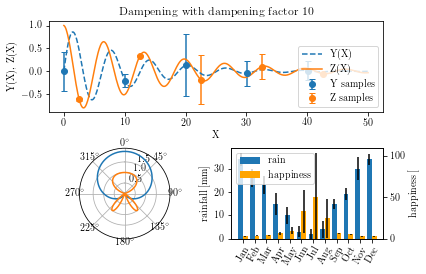

In [24]:
fig = plt.figure()
export_plot(fig)

In [25]:
fig.savefig('awsome_plot.png')
fig.savefig('awsome_plot.pdf')
fig.savefig('awsome_plot.pgf')
fig.savefig('awsome_plot.svg')

In [26]:
%%capture
!pdflatex example.tex

In [27]:
import matplotlib as mpl
latex_custom_preamble = {
    "pgf.rcfonts": False,
    "font.family": "serif",
    "text.usetex": True,
}
mpl.rcParams.update(latex_custom_preamble)

In [28]:
import pint

ureg = pint.UnitRegistry()
w = (18*ureg.cm).to(ureg.inches).m

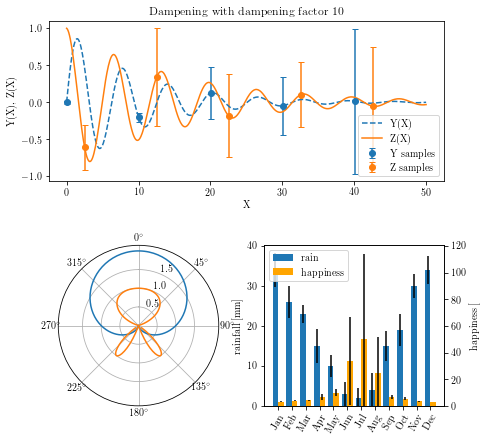

In [29]:
fig = plt.figure(figsize=(w, w))
export_plot(fig)

In [30]:
fig.savefig('awsome_plot.png')
fig.savefig('awsome_plot.pdf')
fig.savefig('awsome_plot.pgf')
fig.savefig('awsome_plot.svg')

In [31]:
%%capture
!pdflatex example.tex